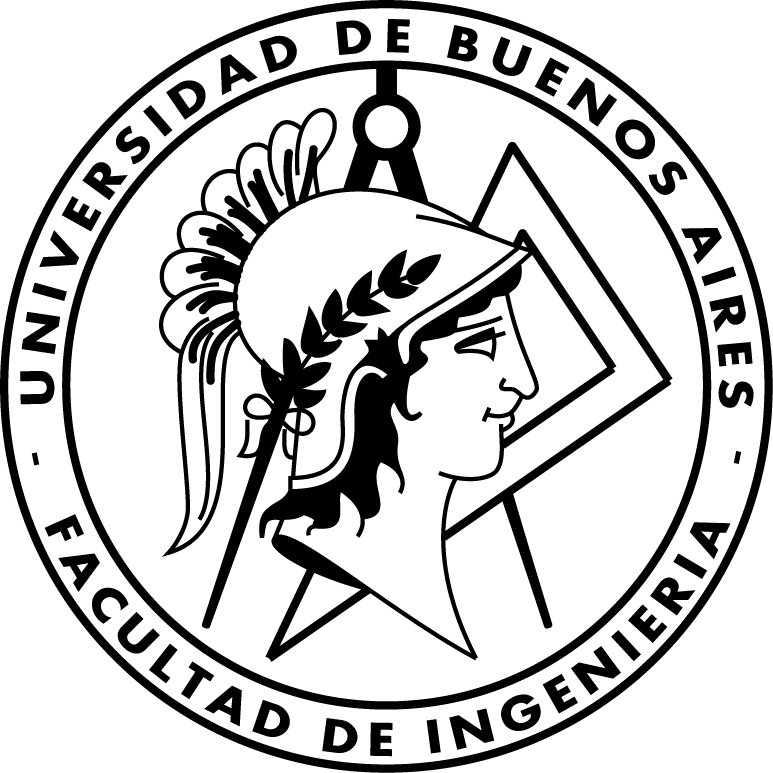

# *Organización de datos 75.06/ 95.58*

#  Trabajo práctico 1

# Análisis exploratorio de datos 

**Primero cuatrimestre del 2020**

Grupo n°16 	Grupo Phyton Fiuba

Apellido y nombre    | Padrón

Alejandro Balladares | 101118

Jonathan Galván Pérez| 101250

Ronnie Del Pino      | 93575

Marcelo Mastroianni  | 88782

# Indice

Proximamente :v

# Introducción

Introducción generica 

# 2. Lectura de datos y primeras impresiones

## 2.0 Análisis general

Se dispone de un archivo csv que nos brinda información sobre []. Este consiste en un dataset de [].  Cada línea del archivo nos da información sobre uno de los tweets. Se realiza la lectura de los datos y se muestra una vista rápida para poder familiarizarnos con la información incluida en el archivo. 

In [251]:
#importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs



from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (20, 10)


In [252]:
df = pd.read_csv('train.csv')
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## 2.1 Datos faltantes en el Dataframe

No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber la cantidad de datos faltantes en cada columna del DataFrame. Se procedió a hacer un conteo de la cantidad de datos nulos y comparar usando el total de datos.

No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber la cantidad de datos faltantes en cada columna del DataFrame. Se procedió a hacer un conteo de la cantidad de datos nulos y comparar usando el total de datos.

In [253]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
id,0,0.00
text,0,0.00
target,0,0.00
keyword,61,0.80
location,2533,33.27


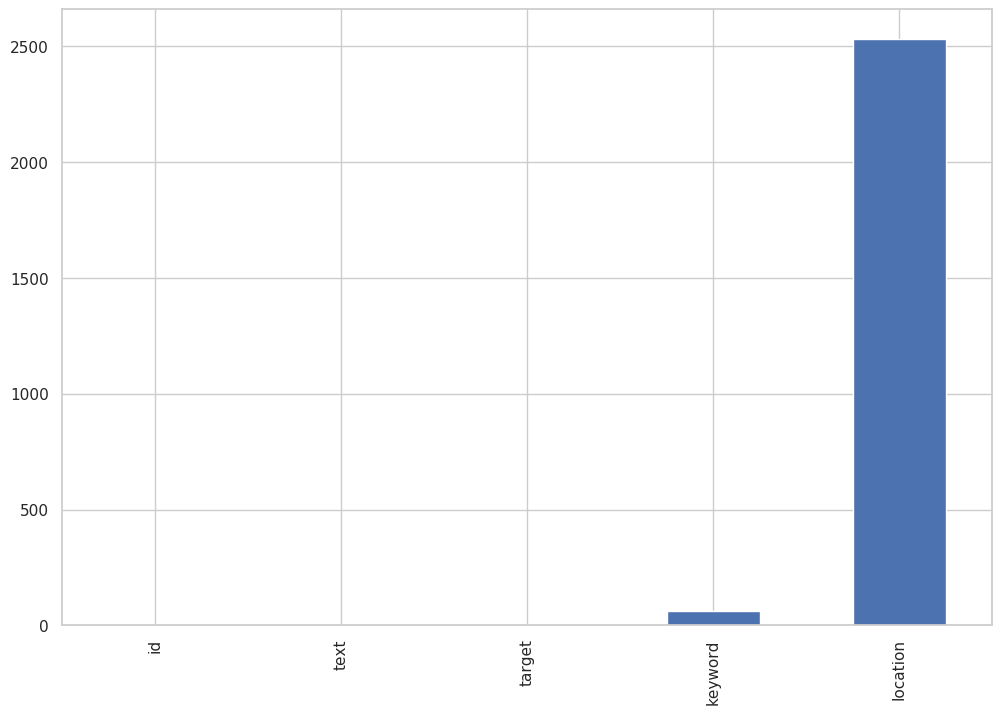

In [254]:
nulls["nulls"].plot(kind="bar",  figsize=(12,8))

Conclusión del gráfico: 

# Titulo

Vistas algunas características de nuestro dataframe procedemos con el análisis exploratorio del mismo para así sacar conclusiones sobre los tweets y sus veracidades.
Comenzaremos analizando a cada columna por separado para saber, a grandes rasgos, como están formadas. #mejorar

# Analisis de las keywords o palabras claves

In [255]:
keywords = pd.DataFrame(df['keyword'].value_counts())
keywords.columns = ['cantidad']
#keywords["porcentaje"] = (keywords["cantidad"]*100)/total
#keywords.sort_index()

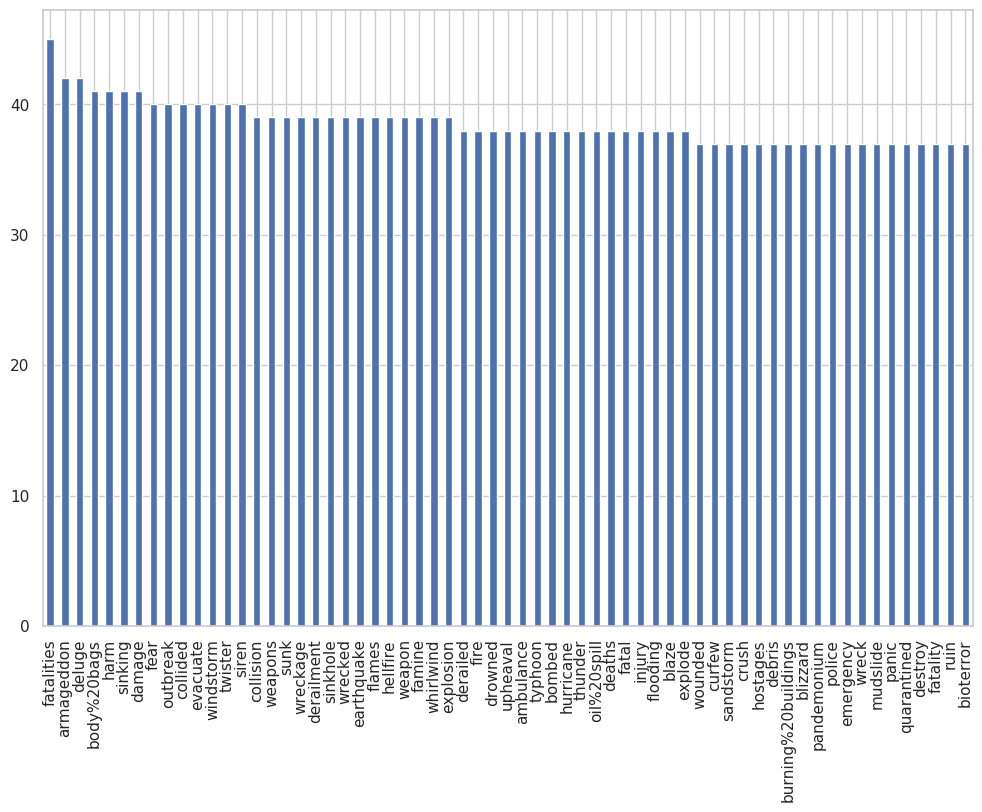

In [256]:
keywords_filtradas = keywords.loc[keywords.cantidad > 36] # <=34 da un grafico horrible
keywords_filtradas["cantidad"].plot(kind="bar",  figsize=(12,8))

Conclusion

Analisis de las ids ( no hay mucho, tal vez valga la pena sacarlo)

In [257]:
ids = pd.DataFrame(df['id'].value_counts())
ids.columns = ['cantidad']
ids.loc[ids.cantidad > 2]
#cada id es unico y solo tuitea una vez

,cantidad


# Localización de los tweets según target

In [299]:
n = 20 # Top n ciudades
grouped_by_location = df.groupby(['location', 'target']).agg({'target': 'count'})
grouped_by_location = grouped_by_location.unstack(level=1)
grouped_by_location = grouped_by_location.reset_index()
grouped_by_location = grouped_by_location.droplevel(0, axis=1)
grouped_by_location[[0, 1]] = grouped_by_location[[0,1]].fillna(value=0)
grouped_by_location['General'] = grouped_by_location[0]+grouped_by_location[1]
grouped_by_location.columns=['Lugar', 'Falsos', 'Verdaderos', 'General']
top_n_general = grouped_by_location[['Lugar', 'General']].sort_values('General', ascending=False).head(n).iloc[::-1]
top_n_verdaderos = grouped_by_location[['Lugar', 'Verdaderos']].sort_values('Verdaderos', ascending=False).head(n).iloc[::-1]
top_n_falsos = grouped_by_location[['Lugar', 'Falsos']].sort_values('Falsos', ascending=False).head(n).iloc[::-1]
top_n_general

,Lugar,General
2249,San Francisco,14.00
577,"California, USA",15.00
1837,"New York, NY",15.00
934,Everywhere,15.00
574,California,17.00
368,Australia,18.00
654,"Chicago, IL",18.00
2868,Worldwide,19.00
1373,Kenya,20.00
2778,"Washington, DC",21.00


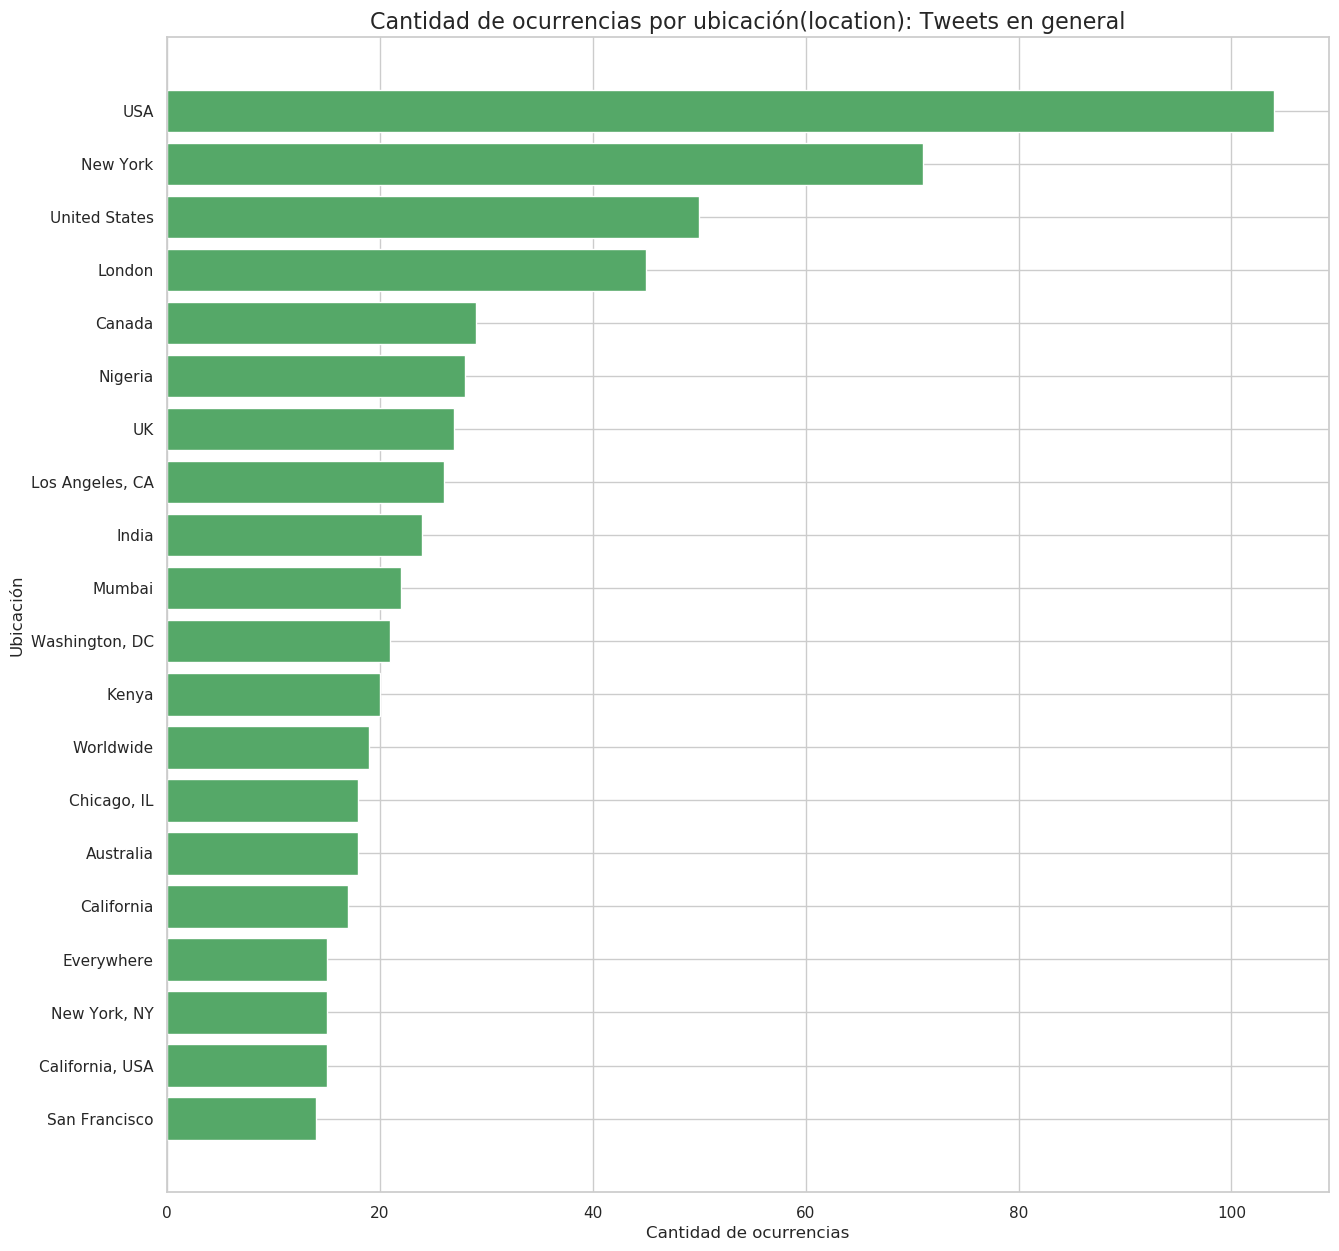

In [259]:
# Tamaño
plt.figure(figsize=(15,15))
# Título
plt.title('Cantidad de ocurrencias por ubicación(location): Tweets en general', fontsize=16)
# Eje X
plt.xlabel('Cantidad de ocurrencias')
# Eje Y
plt.ylabel('Ubicación')
plt.barh(y=top_n_general.Lugar, width=top_n_general.General, color='C2')

plt.show()

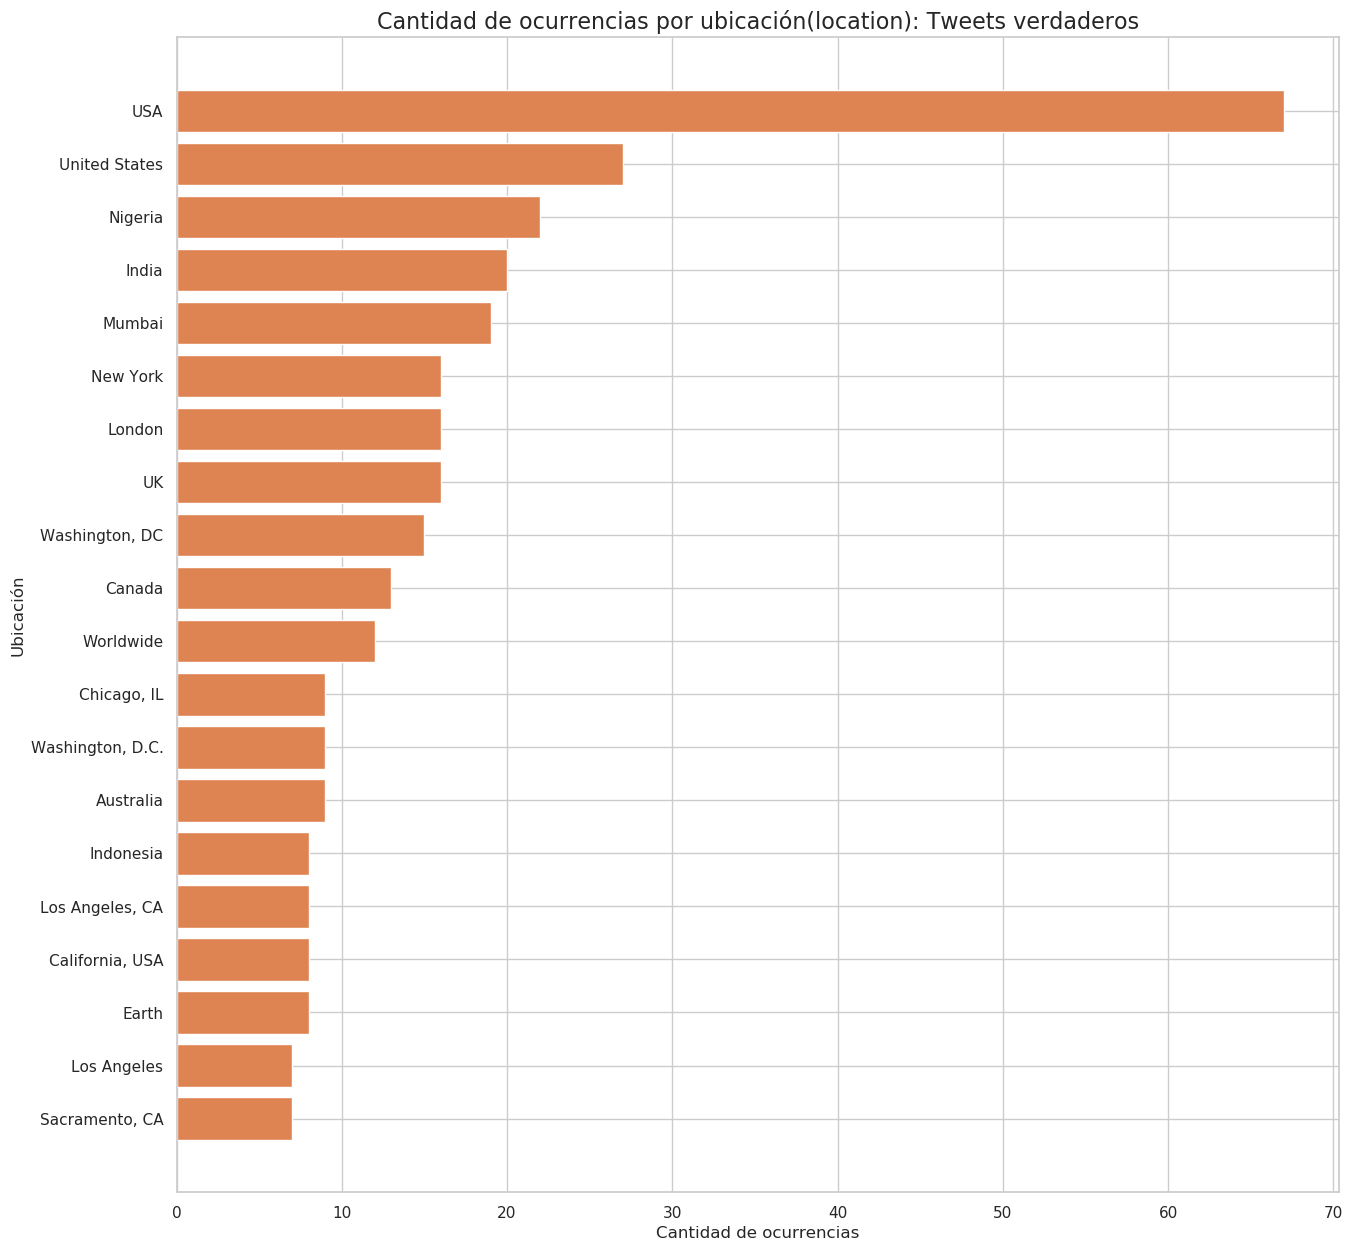

In [260]:
# Tamaño
plt.figure(figsize=(15,15))
# Título
plt.title('Cantidad de ocurrencias por ubicación(location): Tweets verdaderos', fontsize=16)
# Eje X
plt.xlabel('Cantidad de ocurrencias')
# Eje Y
plt.ylabel('Ubicación')
plt.barh(y=top_n_verdaderos.Lugar, width=top_n_verdaderos.Verdaderos, color='C1')

plt.show()

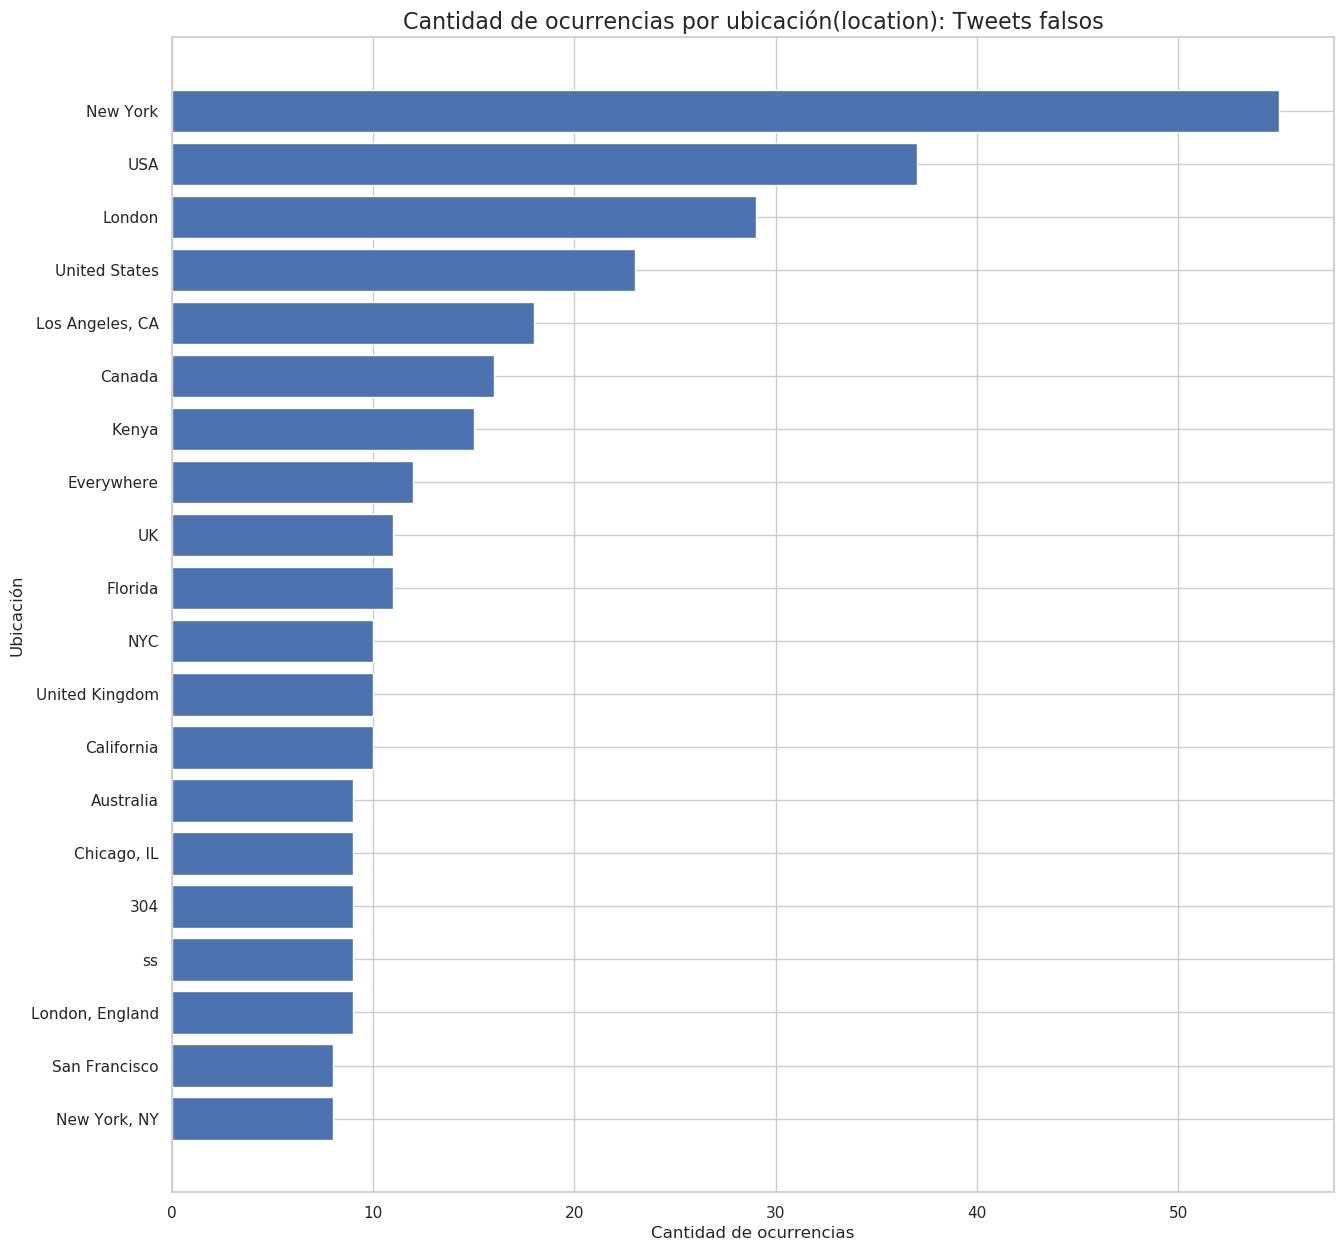

In [261]:
# Tamaño
plt.figure(figsize=(15,15))
# Título
plt.title('Cantidad de ocurrencias por ubicación(location): Tweets falsos', fontsize=16)
# Eje X
plt.xlabel('Cantidad de ocurrencias')
# Eje Y
plt.ylabel('Ubicación')

plt.barh(y=top_n_falsos.Lugar, width=top_n_falsos.Falsos, color='C0')

plt.show()

# Analisis de los targets

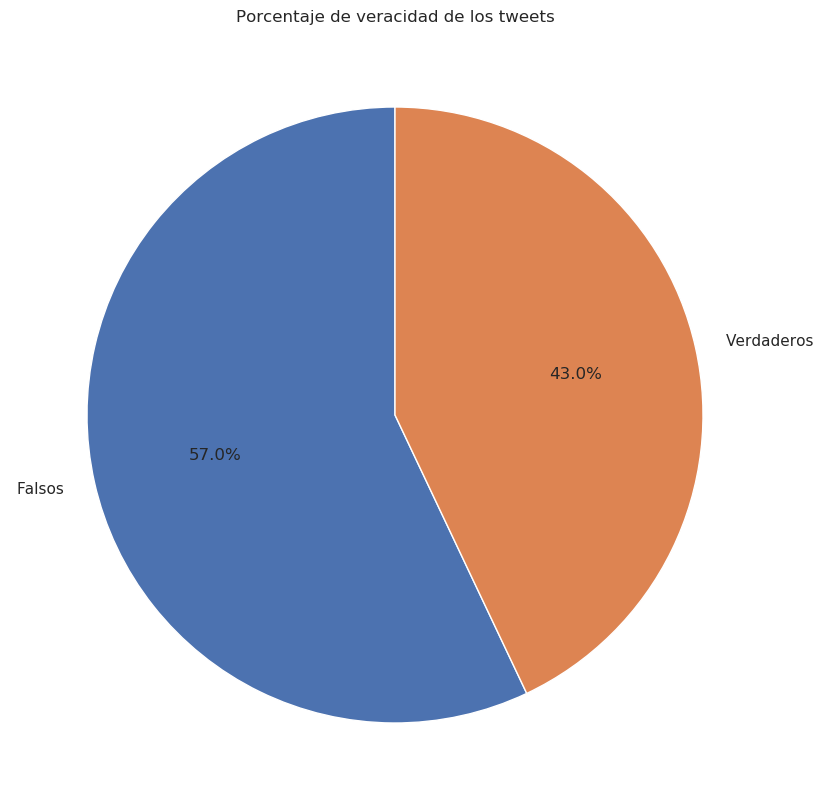

In [262]:
tweets_reales = df[df['target'] == 1]
cant_verdaderos = tweets_reales['target'].count()
tweets_falsos = df[df['target'] == 0]
cant_falsos = tweets_falsos['target'].count()
grafico = plt.pie([cant_falsos, cant_verdaderos],labels=['Falsos', 'Verdaderos'], startangle=90, autopct='%1.1f%%')
plt.title("Porcentaje de veracidad de los tweets")
plt.show(grafico)

Conclusión?

# Titulo?

Ahora procederemos a analizar la veracidad de los tweets teniendo en cuenta el resto de los factores. Comenzaremos analizando la veracidad según las palabras claves 

In [263]:
df['largo_del_texto'] = df['text'].apply(len)
df['mencion'] = df['text'].str.contains('@').astype(int)
df['hashtag'] = df['text'].str.contains('#').astype(int)
df['url'] = df['text'].str.contains('http').astype(int)
df['Sin contenido interactivo'] =  ((df['text'].str.contains('@') == False) & \
(df['text'].str.contains('#')  == False) & \
(df['text'].str.contains('http') == False)).astype(int)
df.tail(10)

,id,keyword,location,text,target,largo_del_texto,mencion,hashtag,url,Sin contenido interactivo
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1,136,0,0,1,0
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,136,0,1,1,0
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,114,0,0,0,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,121,0,0,1,0
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1,134,0,1,1,0
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,0,0,1,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,1,0,0,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,0,0,1,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,0,0,0,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,94,0,0,1,0


In [264]:
tweets_red = df[['target', 'mencion', 'hashtag', 'url', 'Sin contenido interactivo']]
plotdata = tweets_red.groupby('target').agg({'url': 'sum', 'mencion':  'sum', 'hashtag': 'sum', 'Sin contenido interactivo': 'sum'})
plotdata.columns = ['Contiene URL(http)', 'Contiene mención(@)', 'Contiene Hashtag(#)', 'Sin contenido interactivo']
plotdata = plotdata.transpose()
plotdata[0] = plotdata[0]*100/cant_falsos
plotdata[1] = plotdata[1]*100/cant_verdaderos
plotdata.columns = ['Tweets falsos', 'Tweets verdaderos']
plotdata

,Tweets falsos,Tweets verdaderos
Contiene URL(http),41.43,66.40
Contiene mención(@),31.39,20.67
Contiene Hashtag(#),20.41,26.75
Sin contenido interactivo,30.56,15.81


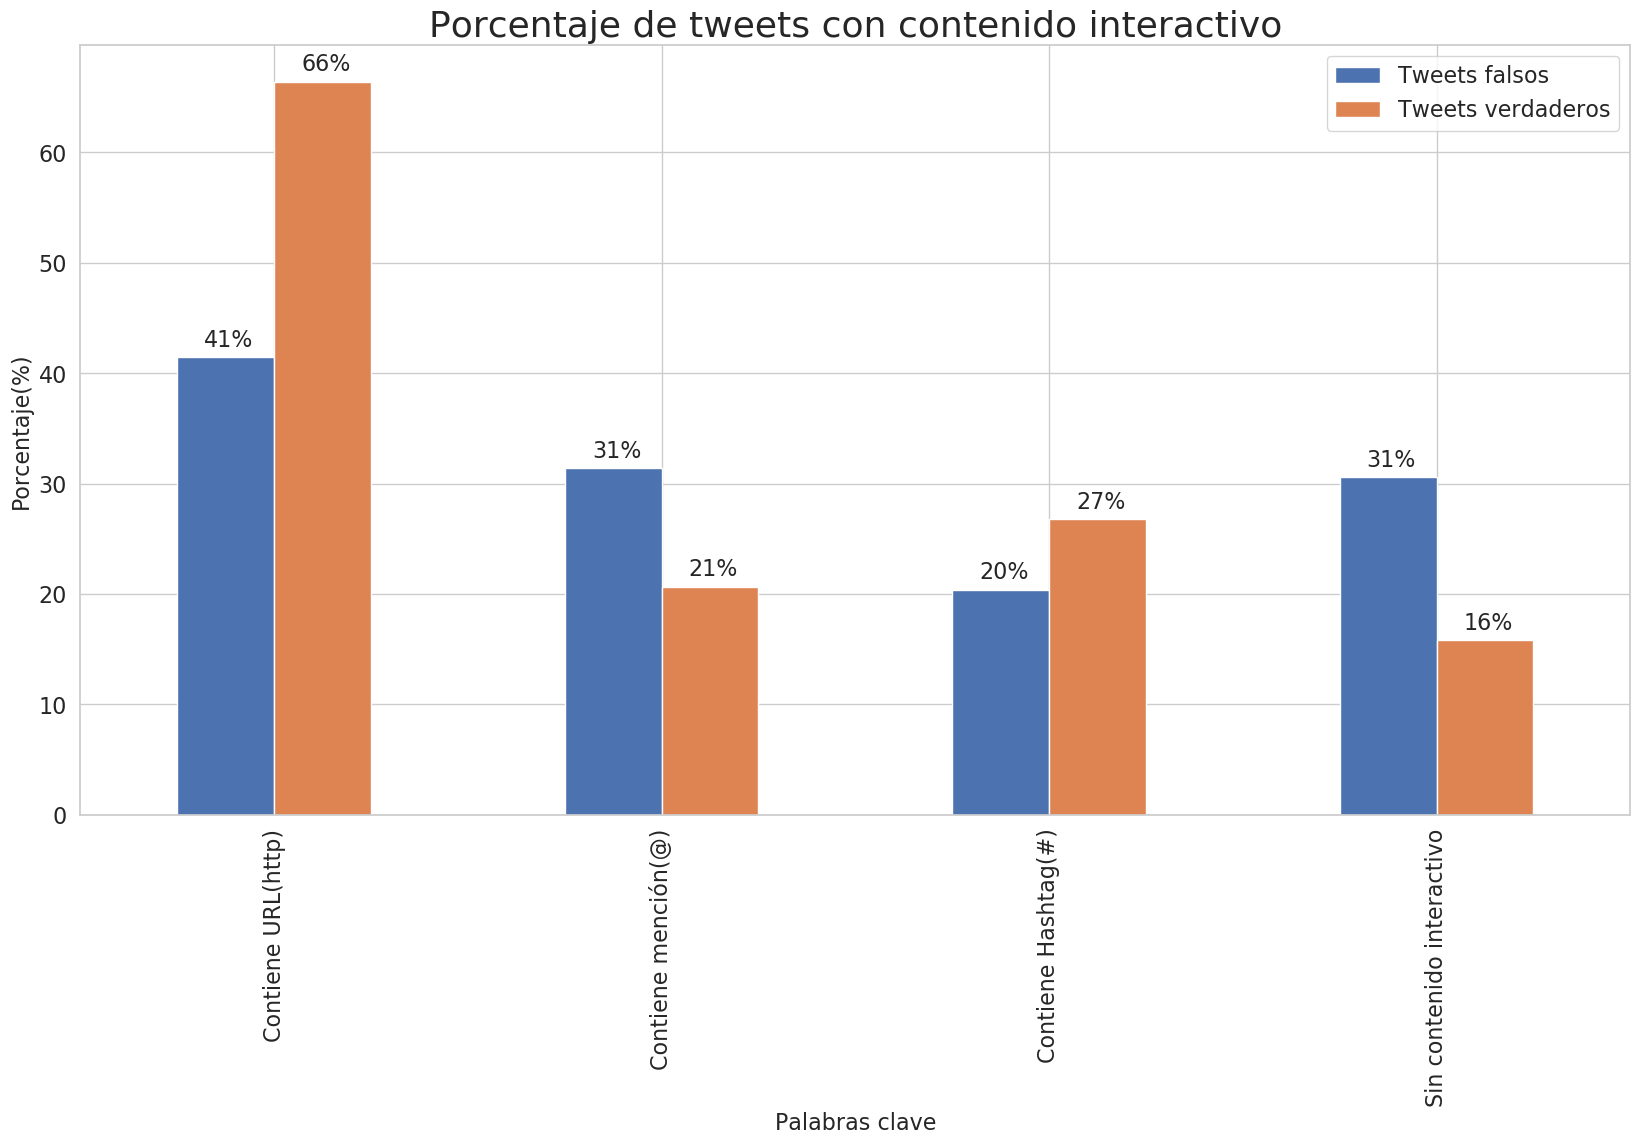

In [265]:
ax = plotdata.plot(kind="bar", stacked=False, fontsize=16)
plt.title("Porcentaje de tweets con contenido interactivo", fontsize=26)
plt.xlabel("Palabras clave", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0%}".format(height/100), xy=(x+0.07, y + height + 1), fontsize=16)

Conclusion

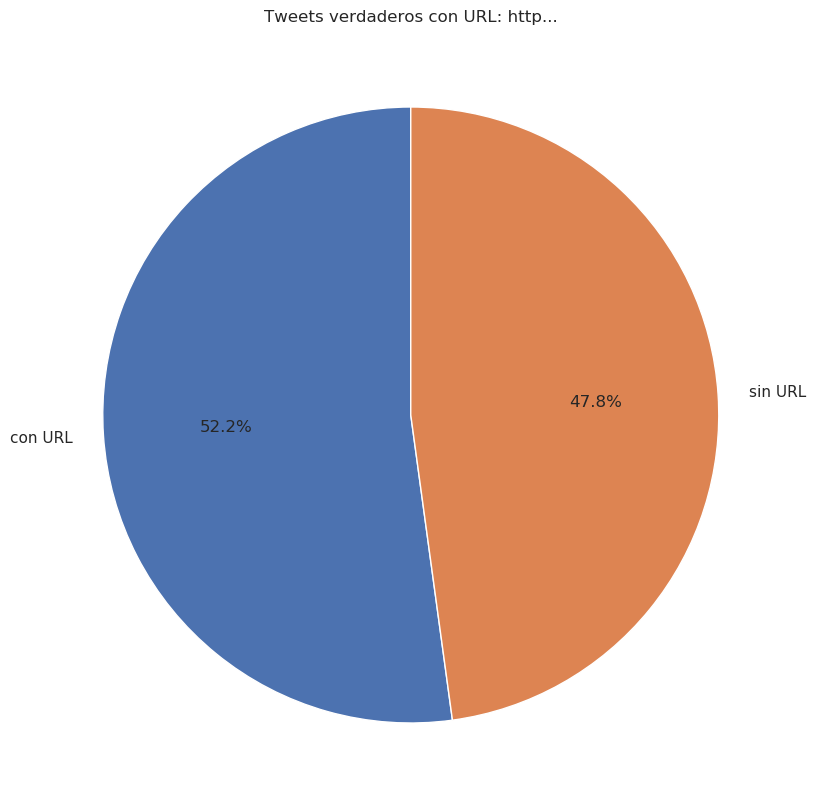

In [266]:
tw_reales_con_link = df[df['url'] == True]['url'].count()
tw_reales_sin_link = df[df['url'] == False]['url'].count()
grafico = plt.pie([tw_reales_con_link, tw_reales_sin_link],labels=['con URL', 'sin URL'], startangle=90, autopct='%1.1f%%')
plt.title("Tweets verdaderos con URL: http...")
plt.show(grafico)

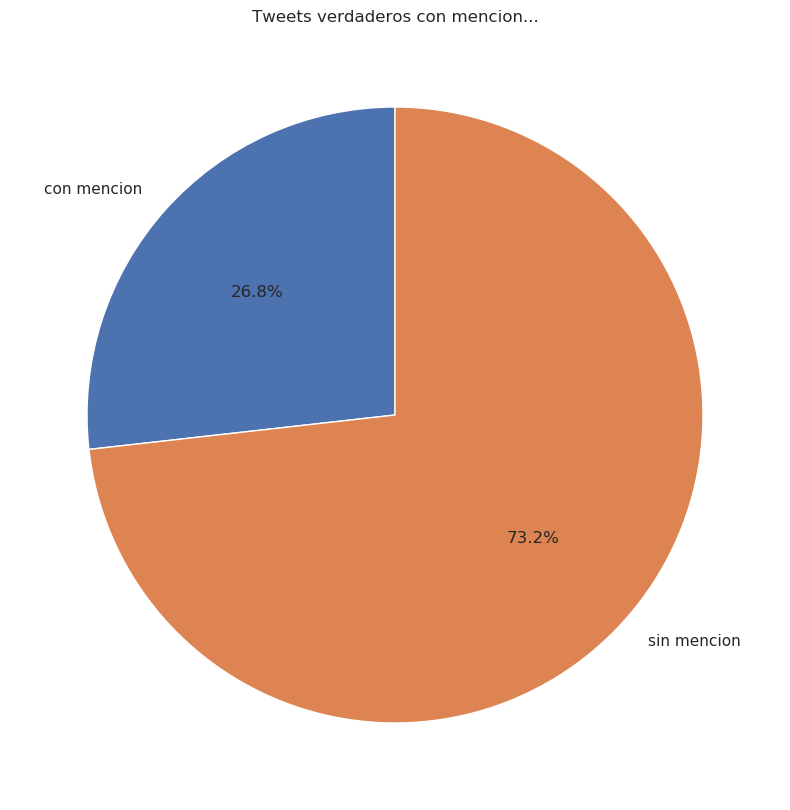

In [267]:
tw_reales_con_mencion = df[df['mencion'] == True]['mencion'].count()
tw_reales_sin_mencion = df[df['mencion'] == False]['mencion'].count()
grafico = plt.pie([tw_reales_con_mencion, tw_reales_sin_mencion],labels=['con mencion', 'sin mencion'], startangle=90, autopct='%1.1f%%')
plt.title("Tweets verdaderos con mencion...")
plt.show(grafico)

In [268]:
#df['largo_del_texto'] = df['text'].apply(len)

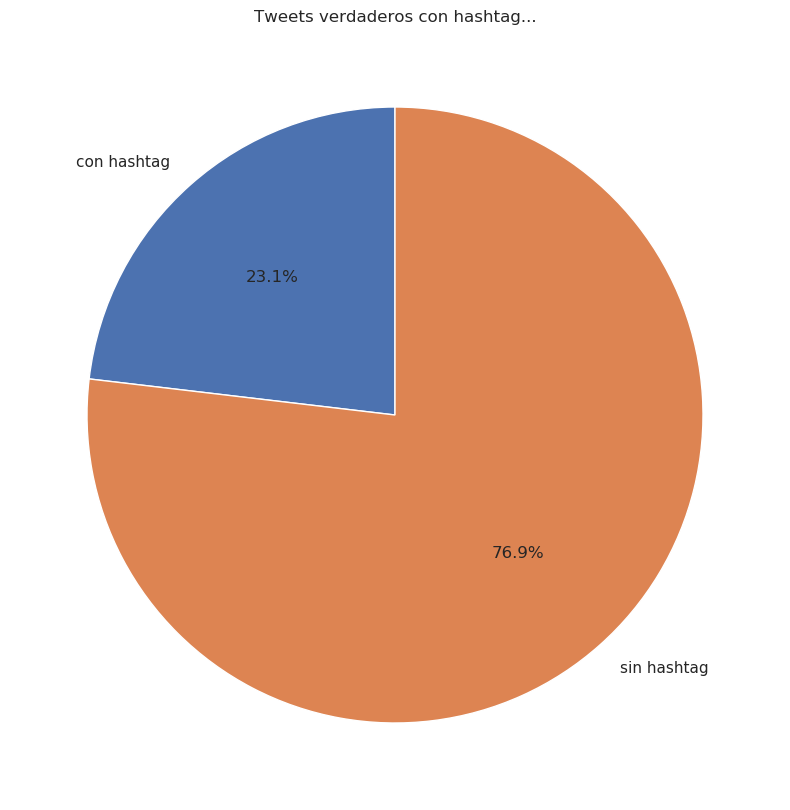

In [269]:
tw_reales_con_hashtag = df[df['hashtag'] == True]['hashtag'].count()
tw_reales_sin_mencion = df[df['hashtag'] == False]['hashtag'].count()
grafico = plt.pie([tw_reales_con_hashtag, tw_reales_sin_mencion],labels=['con hashtag', 'sin hashtag'], startangle=90, autopct='%1.1f%%')
plt.title("Tweets verdaderos con hashtag...")
plt.show(grafico)

# Relación entre las palabras clave y target

In [270]:
df.info()
ranking = 50

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         7613 non-null   int64 
 1   keyword                    7552 non-null   object
 2   location                   5080 non-null   object
 3   text                       7613 non-null   object
 4   target                     7613 non-null   int64 
 5   largo_del_texto            7613 non-null   int64 
 6   mencion                    7613 non-null   int64 
 7   hashtag                    7613 non-null   int64 
 8   url                        7613 non-null   int64 
 9   Sin contenido interactivo  7613 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 594.9+ KB


In [271]:
ndf = df.groupby(['keyword', 'target']).agg({'target': 'count'})
ndf = ndf.unstack(level=1)
ndf = ndf.reset_index()
ndf = ndf.droplevel(0, axis=1)
ndf.columns=['keyword', 'Tweets falsos', 'Tweets verdaderos'] 
ndf['Tweets verdaderos'].fillna(0, inplace=True)
ndf['Tweets falsos'].fillna(0, inplace=True)
ndf['keyword'].fillna('empty', inplace=True)
ndf = ndf.set_index('keyword')
ndf = ndf[(ndf['Tweets verdaderos'] + ndf['Tweets falsos']) > 30] # Aparición de 'keyword' mayor a 30 veces
ndf = ndf.apply(lambda x: x*100/sum(x), axis=1)
top_falsos = ndf.sort_values('Tweets falsos', ascending=False).head(ranking)
top_verdaderos = ndf.sort_values('Tweets verdaderos', ascending = False).head(ranking)
top_verdaderos.head()

,Tweets falsos,Tweets verdaderos
keyword,,
wreckage,0.00,100.00
debris,0.00,100.00
derailment,0.00,100.00
outbreak,2.50,97.50
oil%20spill,2.63,97.37


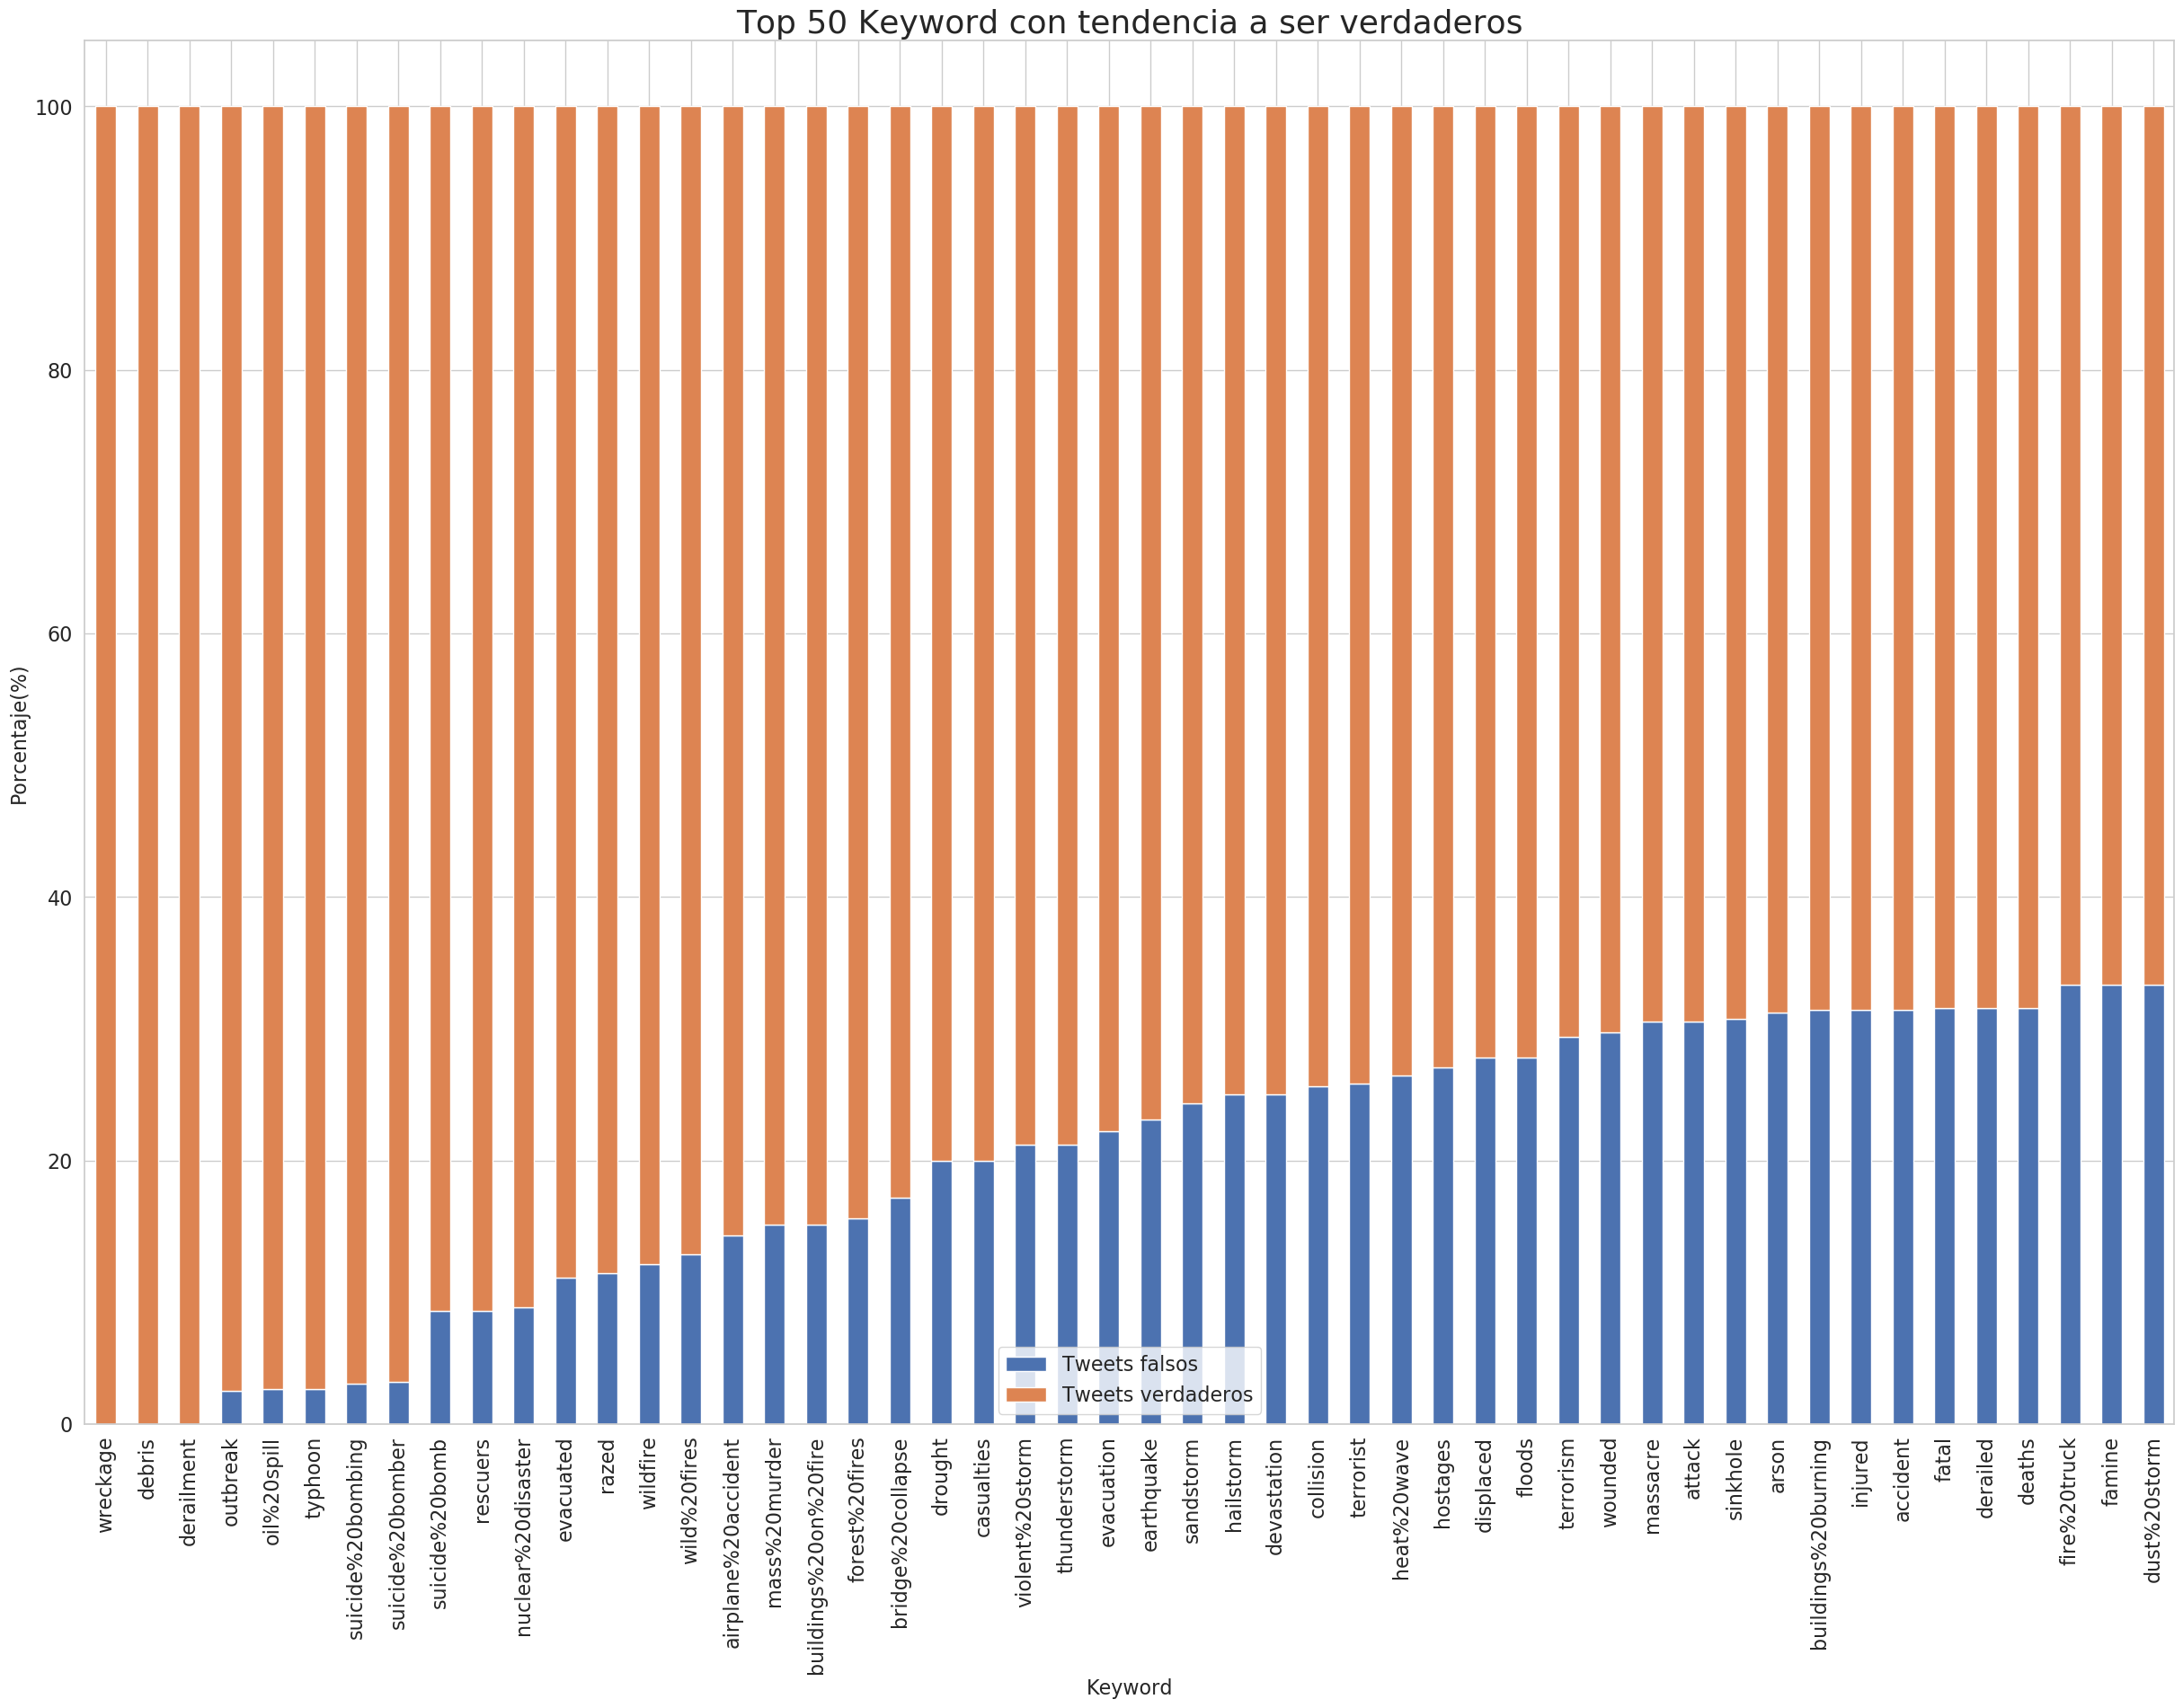

In [272]:
ax = top_verdaderos.plot(kind="bar", stacked=True, fontsize= 16, figsize=(30, 20))
plt.title('Top '+str(ranking)+' Keyword con tendencia a ser verdaderos', fontsize=26)
plt.xlabel("Keyword", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)

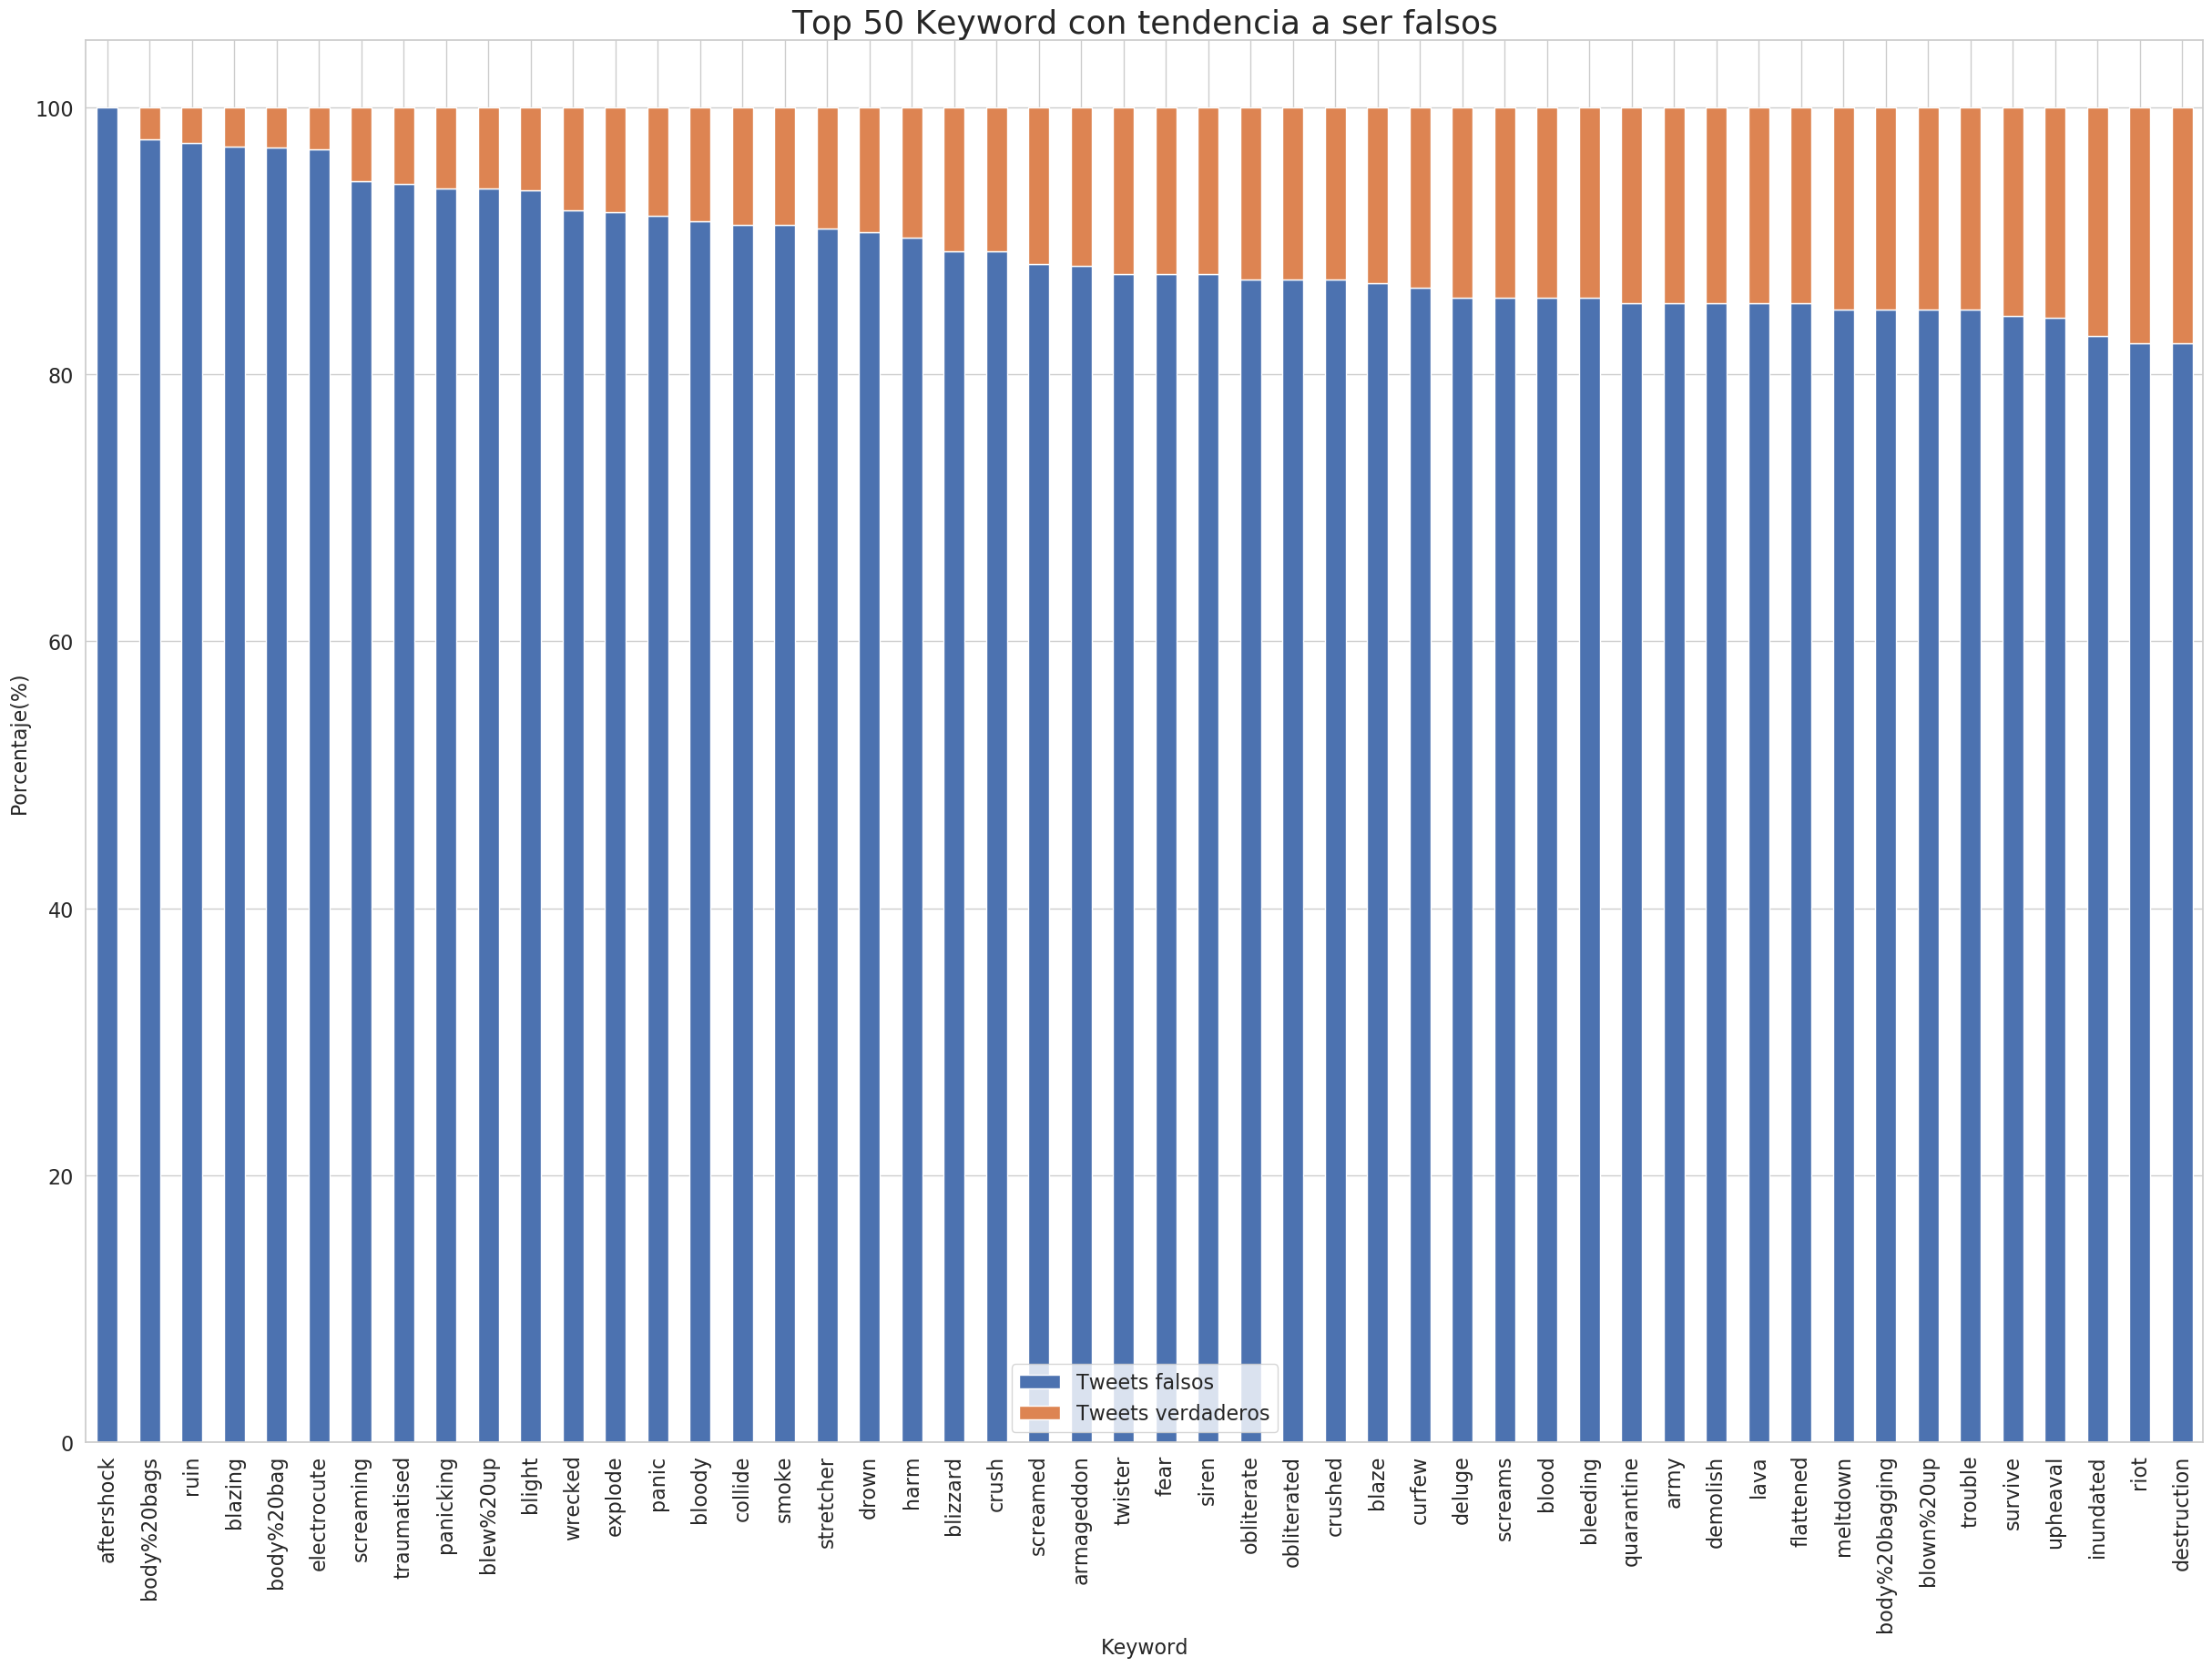

In [273]:
ax = top_falsos.plot(kind="bar", stacked=True, fontsize= 16, figsize=(30, 20))
plt.title('Top '+str(ranking)+' Keyword con tendencia a ser falsos', fontsize=26)
plt.xlabel("Keyword", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)

# Relación entre location y target

In [274]:
df_ver_loc = tweets_reales.groupby(['location'])['target'].agg(['size'])
df_ver_loc.columns = ['tweets_verdaderos']

df_falsos_loc = tweets_falsos.groupby(['location'])['target'].agg(['size'])
df_falsos_loc.columns = ['tweets_falsos']

df_full = pd.merge(df_falsos_loc, df_ver_loc, on='location', how='outer')
df_full['tweets_verdaderos'].fillna(0, inplace=True)
df_full['tweets_falsos'].fillna(0, inplace=True)
df_full = df_full.loc[(df_full.tweets_falsos >10) | (df_full.tweets_verdaderos > 10)] 
df_full.sort_index()

,tweets_falsos,tweets_verdaderos
location,,
Canada,16.00,13.00
Everywhere,12.00,3.00
Florida,11.00,3.00
India,4.00,20.00
Kenya,15.00,5.00
London,29.00,16.00
"Los Angeles, CA",18.00,8.00
Mumbai,3.00,19.00
New York,55.00,16.00


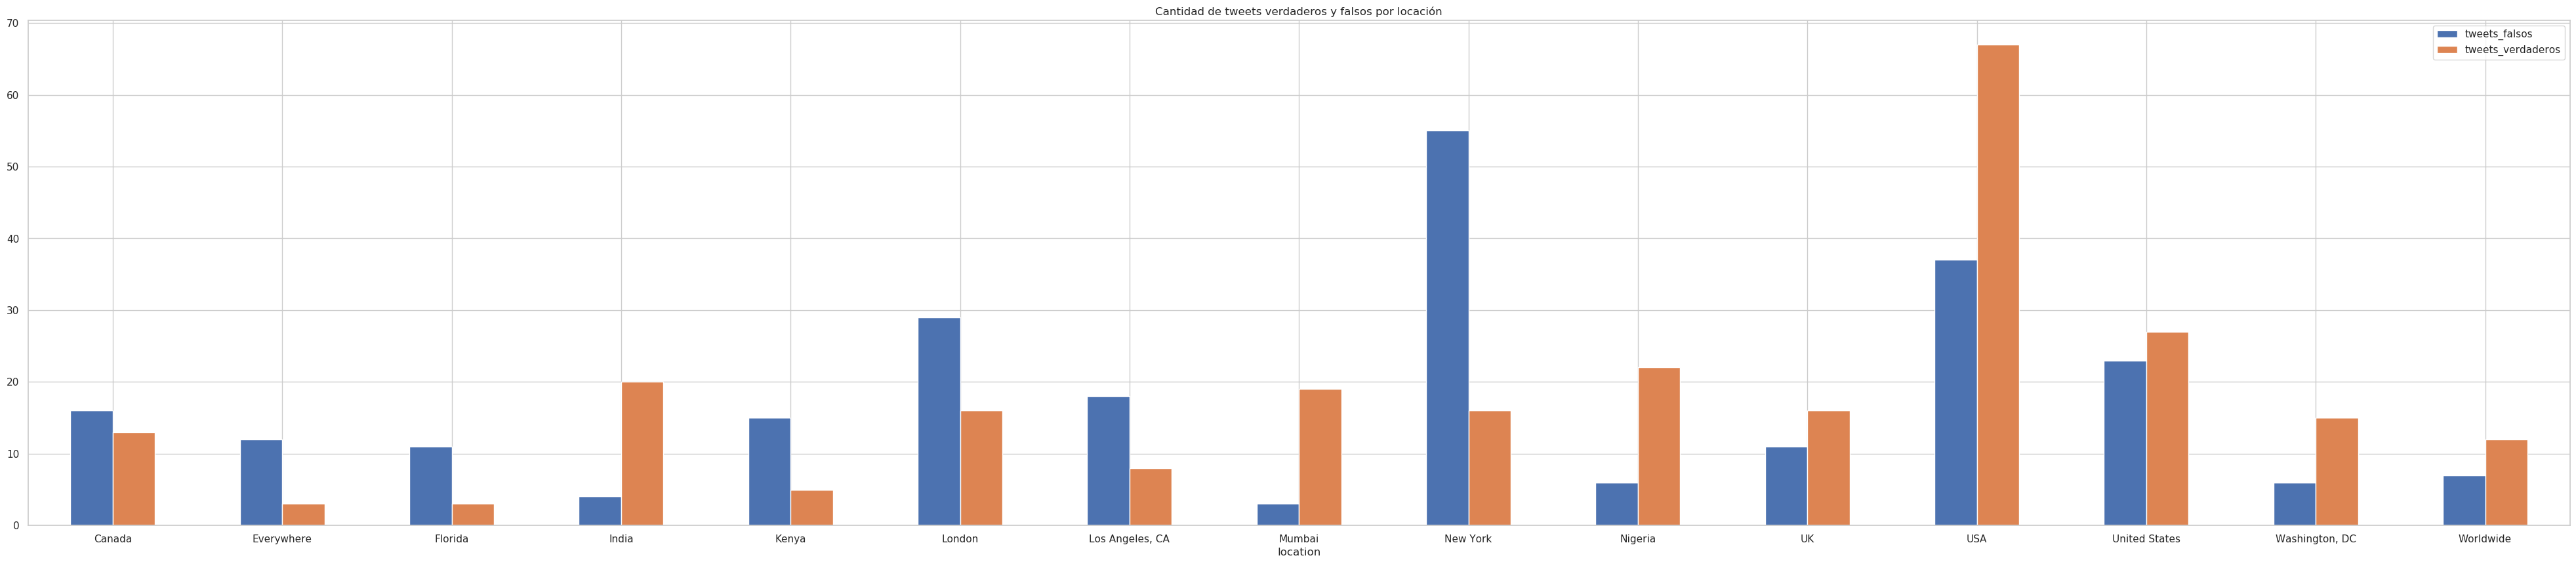

In [275]:
df_full.plot(kind = 'bar', figsize = (50, 10), rot = 0, title = "Cantidad de tweets verdaderos y falsos por locación")
#mejorar el grafico

# Relación entre el largo del texto y el target

In [276]:
df['largo_del_texto'].agg(['mean'])

mean                 101.04
Name: largo_del_texto, dtype: float64

In [277]:
df['largo_del_texto'].max()

157

In [278]:
df['largo_del_texto'].min()

7

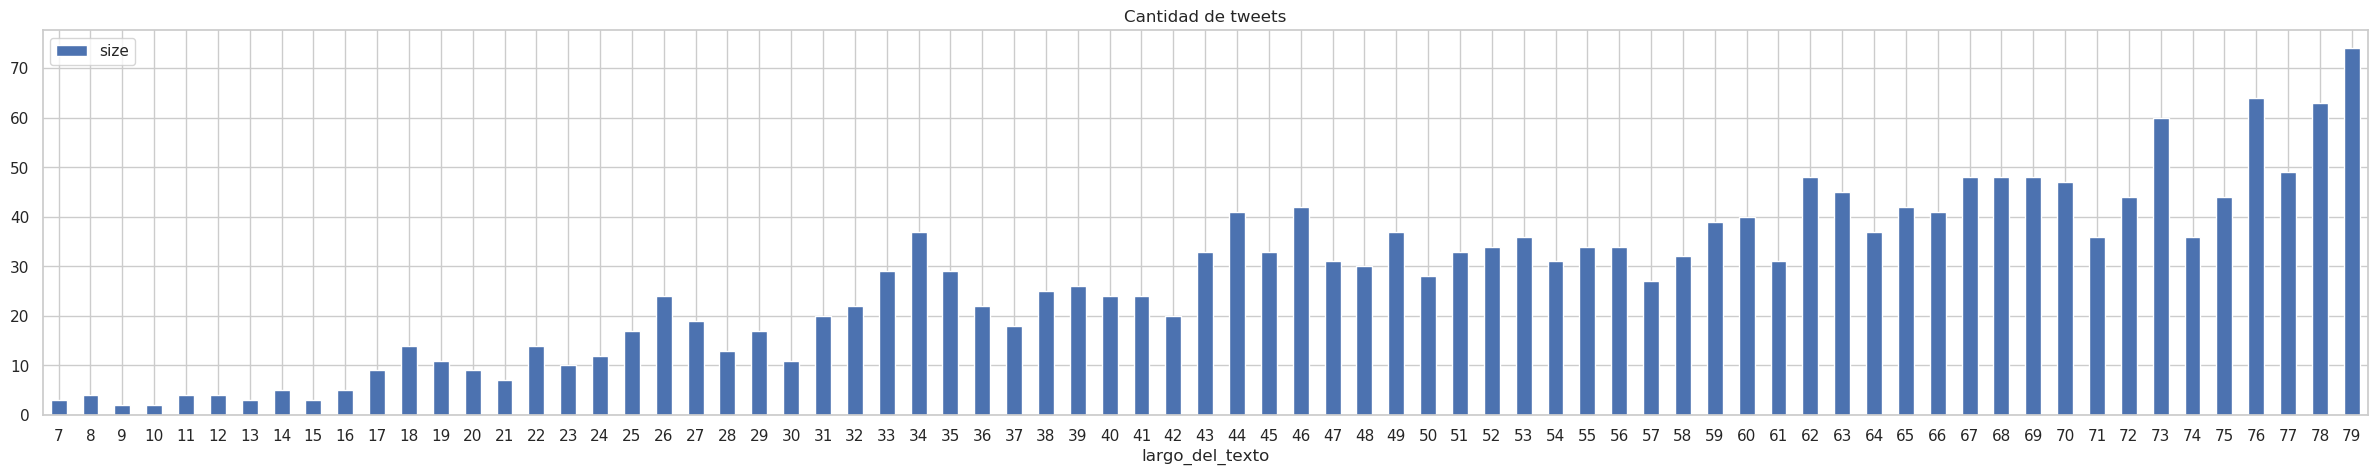

In [279]:
cantidad_de_tweets1 = df.loc[(df.largo_del_texto < 80)]
cantidad_de_tweets1 = cantidad_de_tweets1.groupby(['largo_del_texto'])['largo_del_texto'].agg(['size'])
cantidad_de_tweets1.plot(kind = 'bar', figsize = (30, 5), rot = 0, title = "Cantidad de tweets")


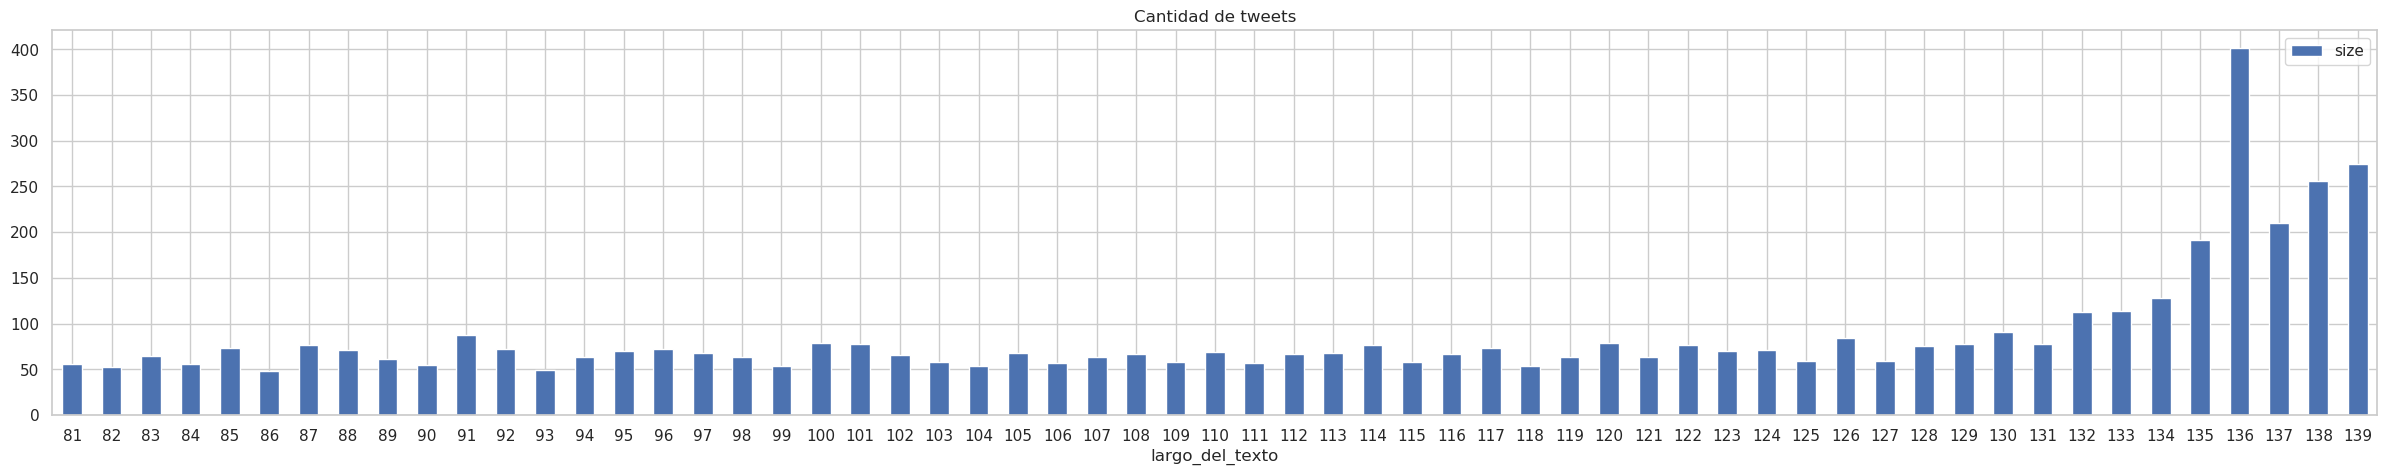

In [280]:
cantidad_de_tweets2 = df.loc[(df.largo_del_texto > 80) & (df.largo_del_texto < 140)]
cantidad_de_tweets2 = cantidad_de_tweets2.groupby(['largo_del_texto'])['largo_del_texto'].agg(['size'])
cantidad_de_tweets2.plot(kind = 'bar', figsize = (30, 5), rot = 0, title = "Cantidad de tweets")

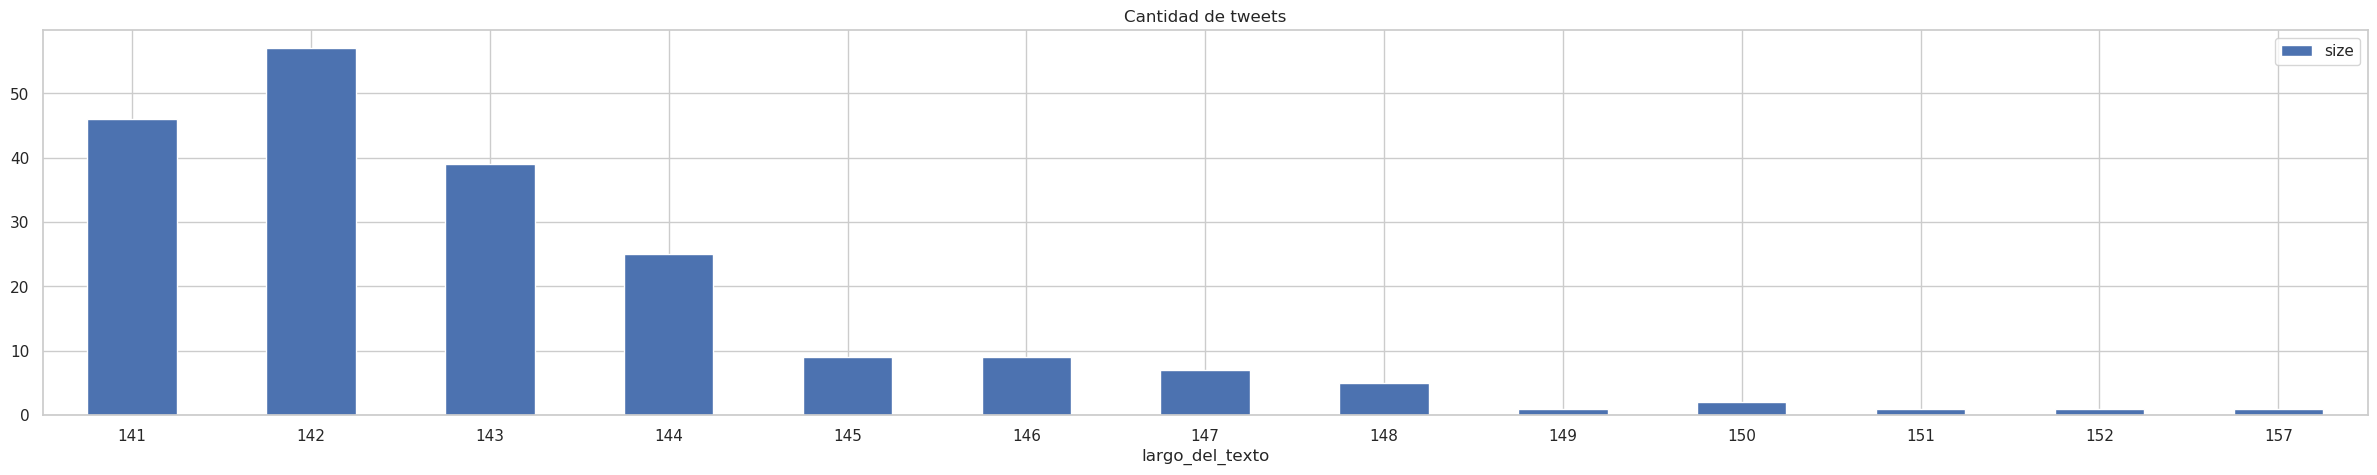

In [281]:
cantidad_de_tweets3 = df.loc[(df.largo_del_texto > 140)]
cantidad_de_tweets3 = cantidad_de_tweets3.groupby(['largo_del_texto'])['largo_del_texto'].agg(['size'])
cantidad_de_tweets3.plot(kind = 'bar', figsize = (30, 5), rot = 0, title = "Cantidad de tweets")

In [282]:
#plt.plot(df_verdaderos['size'],color="red")
#plt.plot(df_falsos['size'],color="blue")
#plt.show()

#df_viviendas['precio_promedio'].plot(kind='line', figsize=(18, 12), linewidth = 3.0,rot=0, title="Precio promedio de las propiedades segun los metros totales", label = 'Viviendas', legend = ' ');

#df2.plot(kind = 'bar', figsize = (15, 5), rot = 0, title = "Comparativa de la veracidad de los tweets según su longitud")

In [283]:
df_verdaderos = df.loc[df.target == 1]
df_verdaderos = df_verdaderos.groupby(['largo_del_texto'])['target'].agg(['size'])

df_falsos = df.loc[df.target == 0]
df_falsos = df_falsos.groupby(['largo_del_texto'])['target'].agg(['size'])

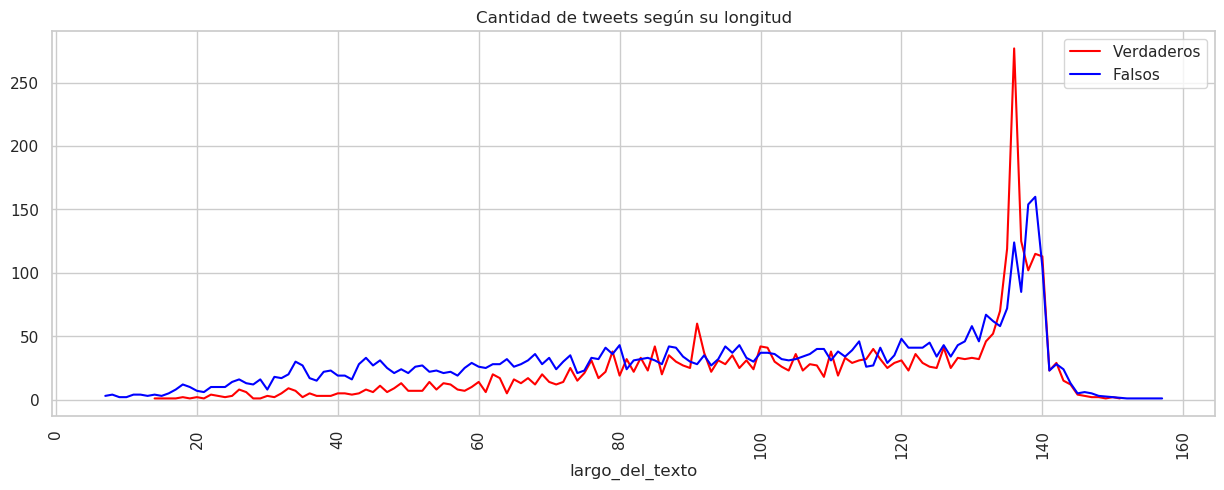

In [284]:
df_verdaderos['size'].plot(figsize = (15,5), rot = 90, title = "Cantidad de tweets según su longitud", color = "Red",label = 'Verdaderos', legend = ' ')
df_falsos['size'].plot(figsize = (15,5), rot = 90, color = "Blue",label = 'Falsos', legend = ' ')

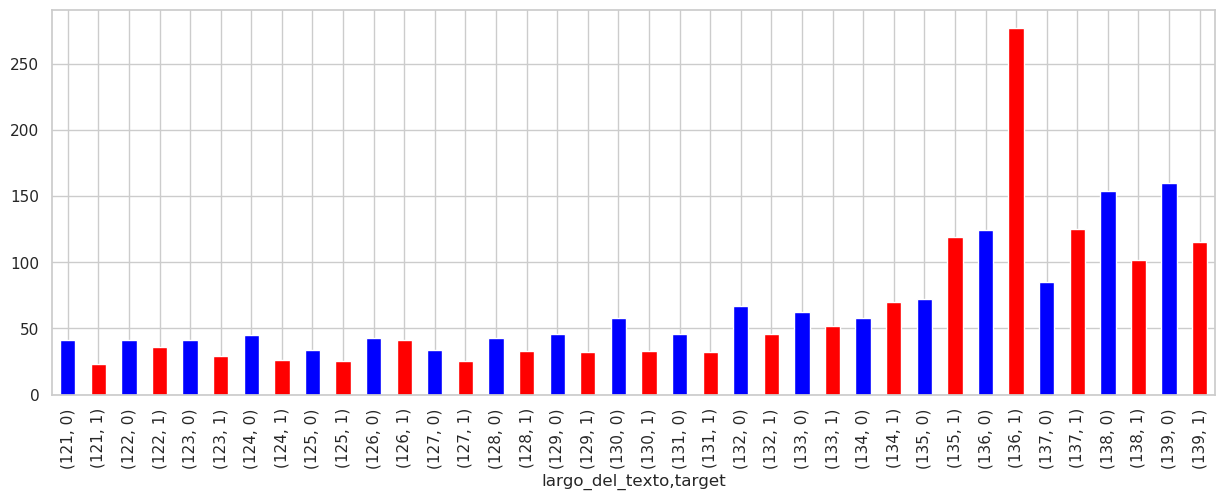

In [285]:
df2 = df.loc[(df.largo_del_texto > 120) & (df.largo_del_texto < 140)]
df2 = df2.groupby(['largo_del_texto','target'])['target'].agg(['size'])

color = {0:'blue',1:'red'}
colores=[]
for indice,fila in df2.iterrows():
    colores.append(color[indice[1]])

df2['size'].plot.bar(color=colores, figsize=(15,5));

In [286]:
#df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])


In [287]:
#df.loc[(df.largo_del_texto > 101) & (df.target == 1)]

In [288]:
#df.loc[(df.largo_del_texto < 20) & (df.target == 1)]

<h2>Veamos las 20 palabras más frecuentes en tweets verdaderos</h2>

In [289]:
#Funcion para dividir texto en lista de palabras
def split(txt, seps):
    default_sep = seps[0]
    for sep in seps[1:]:
        txt = txt.replace(sep, default_sep)
    return [i.strip() for i in txt.split(default_sep)]

#Funcion para contar palabras en listas y almacenar en un diccionario
def agregar(words_dict, new_words):
    for word in new_words:
        if word in words_dict:
            words_dict[word] += 1
        else:
            words_dict[word] = 1

In [290]:
verdaderos_words_dict = {}
tweets_verdaderos = df[df.target == 1]
tweets_verdaderos["text"].apply(lambda x: split(x, (',','.',' '))).apply(lambda x: agregar(verdaderos_words_dict, x))
verdaderos_palabras = pd.DataFrame.from_dict(verdaderos_words_dict, orient='index')
verdaderos_palabras.sort_values(by=0, ascending=False).head(20)

,0
,3610
http://t,2335
the,1060
in,1043
of,890
a,747
to,707
and,467
-,390
on,389


Como podia esperarse son en su mayoria articulos, pronombres, preposiciones, etc.
Probablemente estos también sean las palabras más frecuentes en tweets falsos. Si eleminamos de nuestro conjunto las palabras frecuentes que tengan en común lograremos filtrar la mayoria de estas palabras irrelevantes y además nos quedaran aquellas que son menos frecuentes en los tweets falsos, información que puede ser de utilidad para intentar distinguir ambos tipos de tweets.

In [291]:
tweets_falsos = df[df.target == 0]
falsos_words_dict = {}
tweets_falsos["text"].apply(lambda x: split(x, (',','.',' '))).apply(lambda x: agregar(falsos_words_dict, x))
falsos_palabras = pd.DataFrame.from_dict(falsos_words_dict, orient='index')
falsos_keys = falsos_palabras.sort_values(by=0, ascending=False).head(100).index
#Aún con el filtrado quedan algunas palabras irrelevantes. Las elimino manualmente 
irrelevantes_keys = ['over', 'were', 'than', 'More', 'S', 'This']
verdaderos_top_palabras = verdaderos_palabras.drop(labels=falsos_keys).drop(labels=irrelevantes_keys).sort_values(by=0, ascending=False).head(20)
verdaderos_top_palabras

,0
fire,123
California,94
killed,86
suicide,71
fires,70
Hiroshima,62
disaster,62
Northern,60
train,58
bomb,57


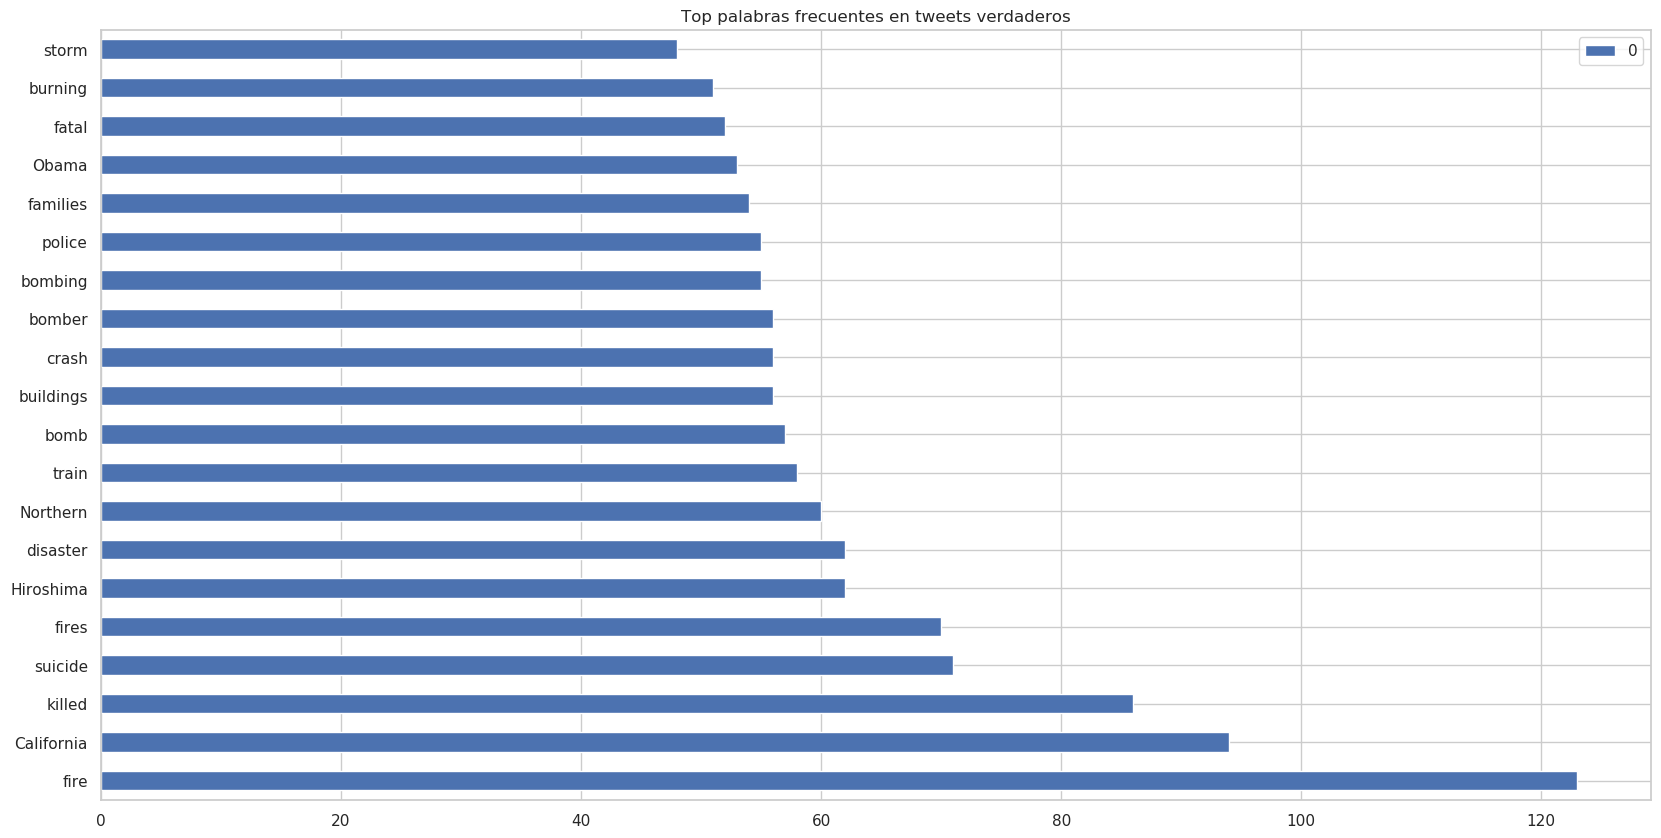

In [292]:
verdaderos_top_palabras.head(20).plot(kind = 'barh', figsize = (20, 10), rot = 0, title = "Top palabras frecuentes en tweets verdaderos")

Procedo realizar lo mismo con los tweets falsos. Esta vez directamente filtraremos las palabras comunes.

In [293]:
#Debo quitar dos palabras de las keys a eliminar porque no aparecen en las palabras de los tweets falsos, lo que ocaciona error
verdaderos_keys = verdaderos_palabras.drop(['Northern', 'bomber']).sort_values(by=0, ascending=False).head(100).index
falsos_palabras.drop(labels=verdaderos_keys).sort_values(by=0, ascending=False).head(20)

,0
??,187
i,119
he,109
can,107
if,107
do,93
don't,88
her,87
new,86
his,86


In [294]:
irrelevantes_keys = ['can', 'if', 'do', 'don\'t', 'her', 'his', 'his', 'it\'s', 'would', 'now', 'what', 'You', 'My', 'how', 'got', '\'']
falsos_top_palabras = falsos_palabras.drop(labels=verdaderos_keys).drop(labels=irrelevantes_keys).sort_values(by=0, ascending=False).head(20)
falsos_top_palabras

,0
??,187
i,119
he,109
new,86
????,75
know,73
Full,69
New,69
see,68
video,68


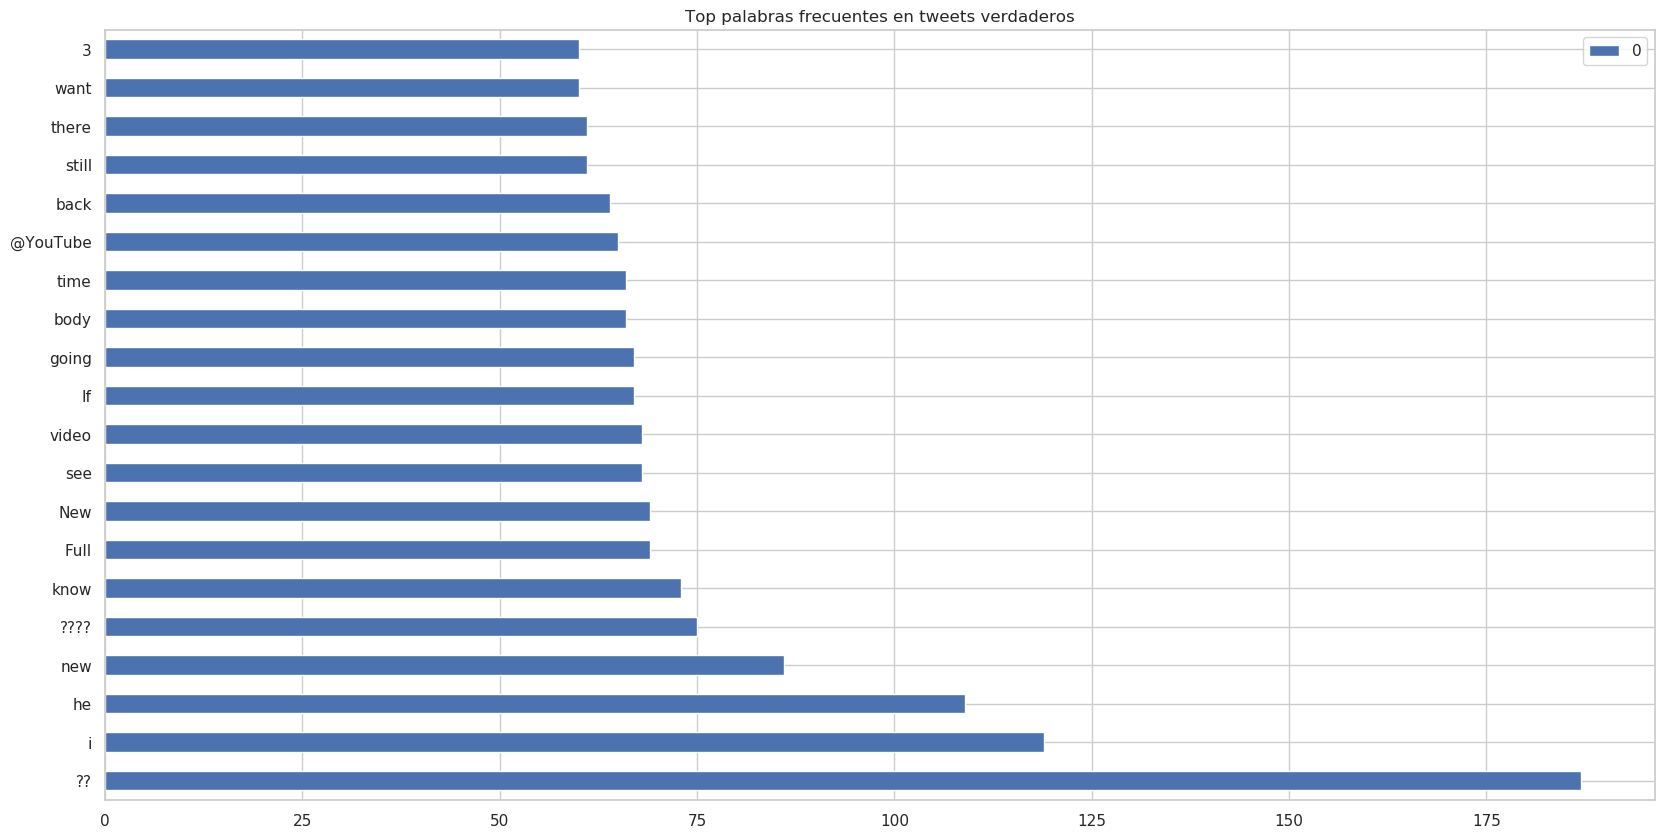

In [295]:
falsos_top_palabras.head(20).plot(kind = 'barh', figsize = (20, 10), rot = 0, title = "Top palabras frecuentes en tweets verdaderos")

Podemos rescatar que el signo de interrogacion es usado frecuentemente en los tweets falsos 

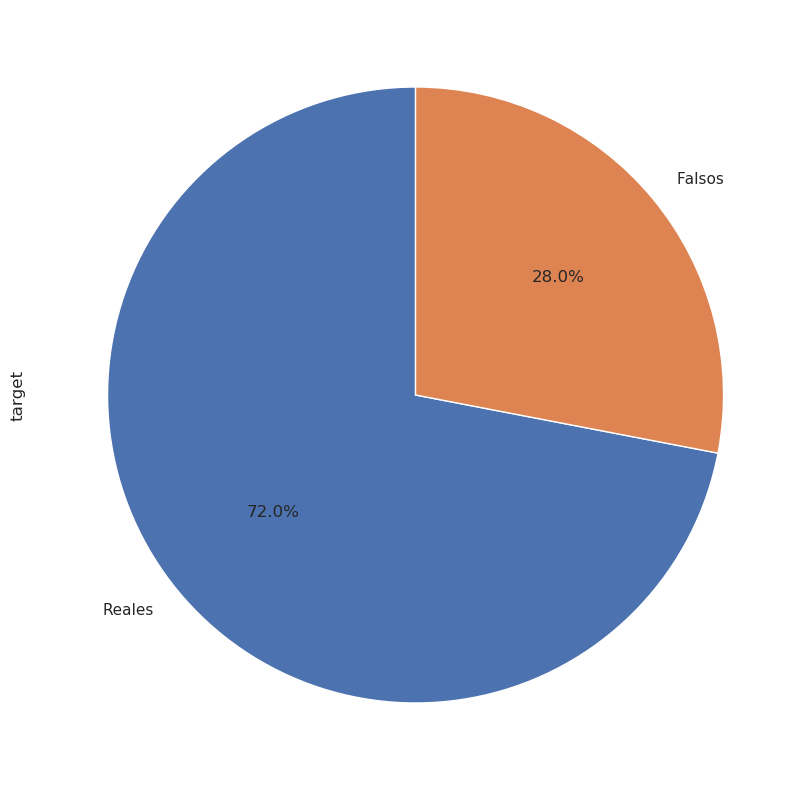

In [296]:
df.loc[df['text'].str.contains('\?'), 'target'].value_counts().plot.pie(labels=['Reales', 'Falsos'], figsize = (10, 10), startangle=90, autopct='%1.1f%%')

In [297]:
df.loc[df['text'].str.contains('fire', case=False), 'target'].value_counts()

1    344
0    129
Name: target, dtype: int64

In [298]:
df.loc[df['text'].str.contains('!', case=False), 'target'].value_counts()

0    523
1    196
Name: target, dtype: int64